In [1]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
from pylab import mpl
import Levenshtein
import re
from collections import Counter

In [170]:
# caseDf=pd.read_csv('data/case.csv')
# col=set(caseDf.iloc[:,3].values)
# pd.set_option('max_colwidth',1000)

In [2]:
csv_file = 'data/power-facts.csv'
df = pd.read_csv(csv_file)

In [3]:
def  recommender_by_id(case_id,df1):
    r_df=pd.DataFrame()
    recommander=dict()
    target_line=df[df['CASE_ID']==case_id].ILLEGAL_FACTS.to_string(index=False).strip()
    for index,row in df1.iterrows():
        sim=Levenshtein.jaro_winkler(target_line, row.values[4].strip())
        recommander[row.values[0]]=sim
    for i,pre in enumerate(sorted(recommander.items(),key=lambda x:x[1],reverse=True)[0:21]):
        index=df[df['CASE_ID']==pre[0]].index.values[0]
        if case_id==pre[0]:
            pass
            continue 
        r_df_len=r_df.shape[0]
        r_df=r_df.append(df.iloc[index,[0,4]])
    r_df.columns=['case_id', 'illegal_facts']
    return r_df

In [10]:
def by_jaro_winkler(case_id):
    power_id=df[df['CASE_ID'] == case_id].POWER_ID.to_string(index=False).strip()
    df1=df[df['POWER_ID'] == power_id]
    df_len=df1.shape[0]
    if df_len>=20:
        r_df=recommender_by_id(case_id,df1)
    else:
        print("案件数量太少，无法推荐")
        r_df=None
    return r_df

In [11]:
    r_df=by_jaro_winkler('71ebf874-8b7f-4d40-afab-8039bd827ef5')
    print(r_df)

                                   case_id  \
1013  168384ef-2ece-4ba1-ba63-70f8c1112821   
1035  b5e74c0f-cbee-4ace-b92d-60f46f396c0e   
1015  029a0ebf-1701-4fe0-a7fd-1e60779c8244   
1016  82dfb469-59dc-45c1-b62a-1d1b30129f7b   
1020  a1ba8141-4464-4987-9e4e-9cd053b62f60   
1022  391fab50-74c0-4d39-8681-b8d403da23a8   
1038  60959785-4c96-497f-93d6-a1ba667f6df3   
1040  ad73b009-b64f-454e-850d-55efa64ca7be   
1045  c6878526-db85-4a3e-87e6-67fa466efcad   
1032  f6c712bc-7cfe-4ef1-b709-c68f7d853394   
1007  3fa21b33-f47e-46b4-99d4-9916ea0d6c9c   
1014  5c2f861a-80f1-4216-95de-2b51069cff53   
999   80197e0d-f267-4609-98f3-ca45f35a2ee4   
1034  cefa2837-f7a6-43c9-b49e-d27ef1dbd125   
1039  c91d0c61-6016-4d46-a35b-f35c52a6f93d   
1009  5e71dafe-3fa8-4590-8fee-f903aa6e81a1   
651   44c7b557-a490-47c4-9b54-ce49e5aba57b   
1002  fa466ae9-917c-48f4-a038-68415ac72c1a   
1037  0731105a-be95-4b9d-96e7-84111b9492d3   
1036  964d10ef-4c5b-4ea5-8410-a7d0b18fcc74   

                                 

In [ ]:
from law Predict import LawPredictor
def case_recommender(case_id):
    test=LawPredictor.PowerClassifier('anjian')
    illegal_facts=df[df['CASE_ID']==case_id].ILLEGAL_FACTS.to_string(index=False).strip()
    power_id,power_name=test.power_predict(fact)
    

In [101]:
def recommender(df,re_time=1):
    filename='result\\'+df.iloc[0,4]+'.txt'
    with open(filename,'a',encoding='utf-8') as file:
        file.write("案由："+df.iloc[0,4]+'\n\n')
        for i in range(0,re_time):
            recommander=dict()
            df_len=df.shape[0]
            target = np.random.randint(0, high=df_len)
            target_line=df.iloc[target][2]
            file.write("待推荐案例："+target_line+"\n\n")
            for index,row in df.iterrows():
                sim=Levenshtein.jaro_winkler(target_line, row.values[2])
                recommander[row.values[0]]=sim
            file.write("推荐结果：\n")
            for pre in sorted(recommander.items(),key=lambda x:x[1],reverse=True)[0:11]:
                if df.iloc[target,0].strip()==df[df['ID'] == pre[0]].ID.to_string(index=False).strip():
                    continue
                file.write(df[df['ID'] == pre[0]].ILLEGAL_FACTS.to_string(index=False)+"\n\n")      

In [18]:
for item in col:
    df=caseDf[caseDf['POWER_ID'] == item]
    df_len=df.shape[0]
    if df_len<20:
        continue
    recommender_list=recommender(df,re_time=2)

In [19]:
mydict={}
for item in col:
    mydict[[x for x in set(caseDf[caseDf['POWER_ID'] == item].POWER_NAME)][0]]=
    len(caseDf[caseDf['POWER_ID'] == item].index.tolist())
    

SyntaxError: invalid syntax (<ipython-input-19-75b428a0504f>, line 3)

In [187]:
import collections
sortdict=collections.OrderedDict()
keylist=[]
vallist=[]
for k in sorted(mydict,key=mydict.__getitem__,reverse=True):
    if mydict[k]>=50:
        sortdict[k]=mydict[k]
key_list = list(sortdict.keys())
val_list=list(sortdict.values())
order=[x for x in range(0,len(val_list))]
len(sortdict)


27

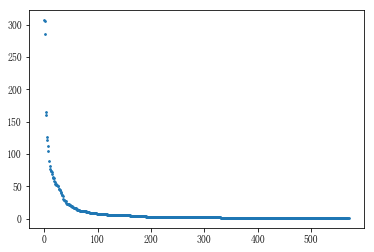

In [53]:
plt.scatter(order,val_list,s=3)

In [191]:
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
fig = plt.gcf()
fig.set_size_inches(300, 300)
plt.yticks(fontsize=60)
plt.barh(range(len(val_list)), val_list,tick_label = key_list,height=0.4)
plt.savefig('1.png')
plt.show()
